In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
cp_df=df.copy()

In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

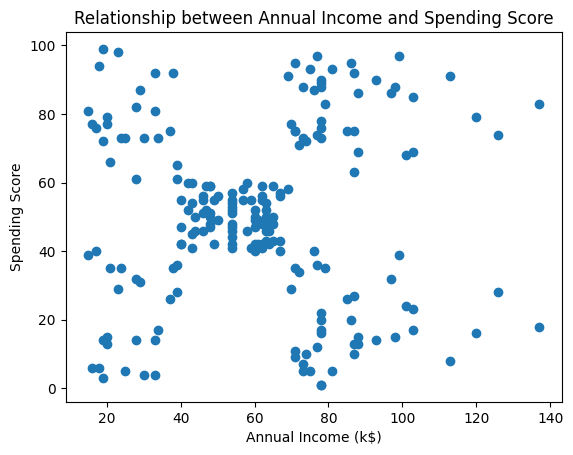

In [7]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('Relationship between Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [8]:
cp_df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Assigning annual income and spending amount to X to cluster customers

In [9]:
X=cp_df.iloc[:,[3,4]].values

In [10]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Evaluation Metrics for Clustering 

## Elbow point
- The elbow point is the number of clusters where the rate of decrease in a clustering metric, like within-cluster sum of squares (WCSS), slows down significantly, indicating the optimal number of clusters.

In [11]:
#caluculating wcss
wcss=[]
for i in range(1,11):
       kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
       kmeans.fit(X)
       wcss.append(kmeans.inertia_)
    

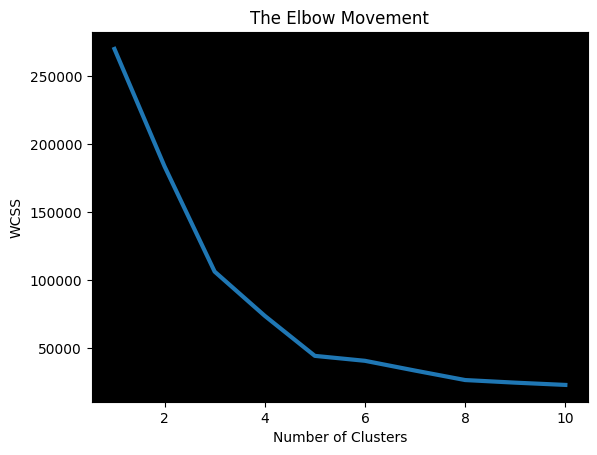

In [12]:
#elbow movement
plt.gca().set_facecolor('black')
plt.plot(range(1,11),wcss,linewidth=3)
plt.title('The Elbow Movement')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

####   The best cluster point is 5 as after it the curve goes down

### Silhouette score
####  The silhouette score is a metric used to evaluate the quality of clustering in unsupervised learning. It provides a measure of how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1

- A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. This is indicative of a good clustering.

- A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.

- A score close to -1 indicates that the object may have been assigned to the wrong cluster.

In [13]:
silhouette_scores = []

for n_clusters in range(2, 11):  # Start from 2 clusters
    # Initialize and fit KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)
    print("Number of clusters:", n_clusters, "| Silhouette score:", silhouette_avg)


Number of clusters: 2 | Silhouette score: 0.39564531743995546
Number of clusters: 3 | Silhouette score: 0.46761358158775435
Number of clusters: 4 | Silhouette score: 0.4937945814354117
Number of clusters: 5 | Silhouette score: 0.553931997444648
Number of clusters: 6 | Silhouette score: 0.5128405328004378
Number of clusters: 7 | Silhouette score: 0.5017174409749505
Number of clusters: 8 | Silhouette score: 0.4962769338093321
Number of clusters: 9 | Silhouette score: 0.45587414130065596
Number of clusters: 10 | Silhouette score: 0.4426214845978157


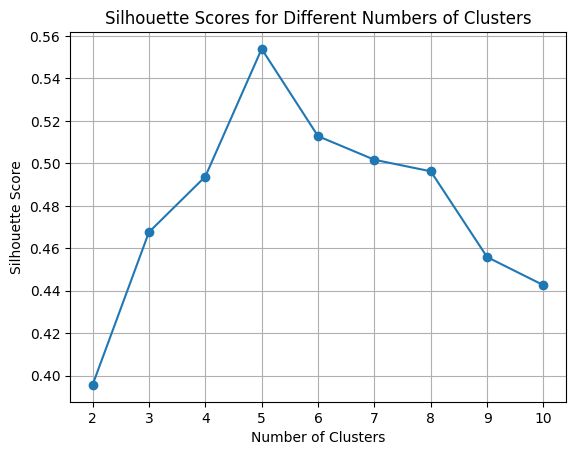

In [14]:
# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


#### we can confirm 5 is the best cluster value.

In [15]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
Y=kmeans.fit_predict(X)

In [16]:
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


# plotting clusters

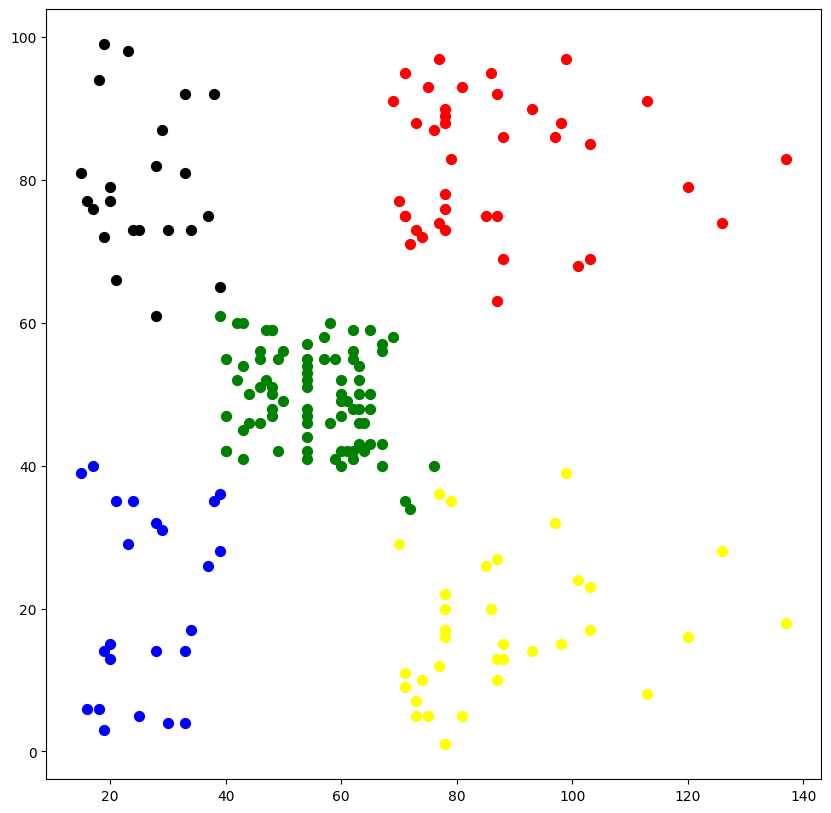

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='black',label='Cluster 5')

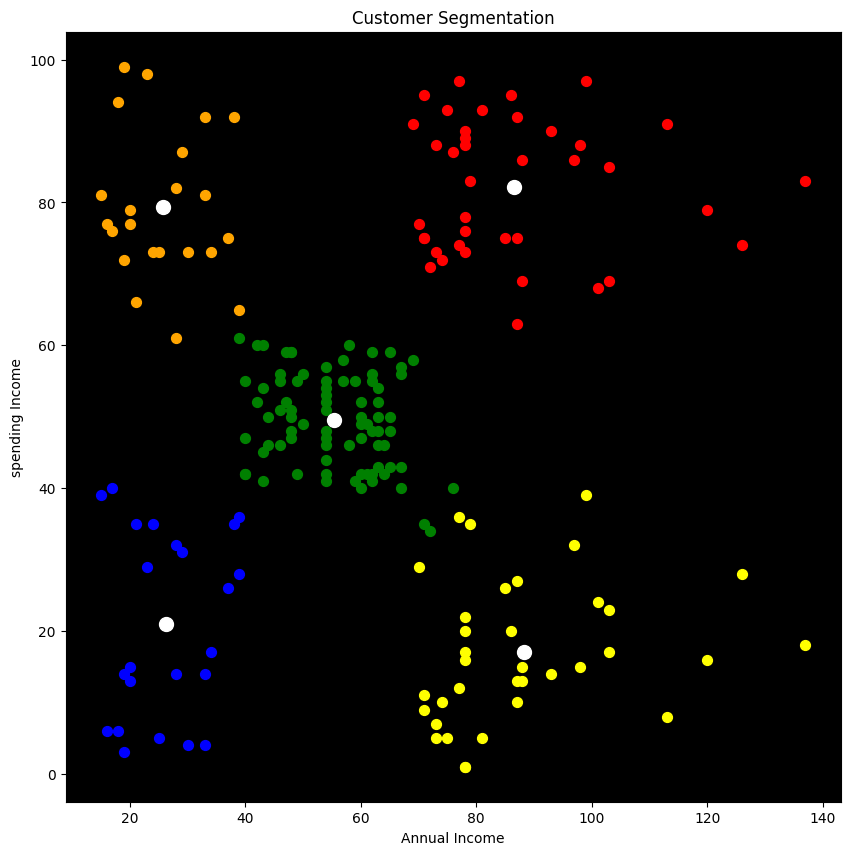

In [18]:
plt.figure(figsize=(10,10))
plt.gca().set_facecolor('black')
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='orange',label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='white',label="centroids")
plt.title("Customer Segmentation");
plt.xlabel("Annual Income");
plt.ylabel("spending Income");


### what if cluster point is taken as  3

In [19]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
Y=kmeans.fit_predict(X)
print(Y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


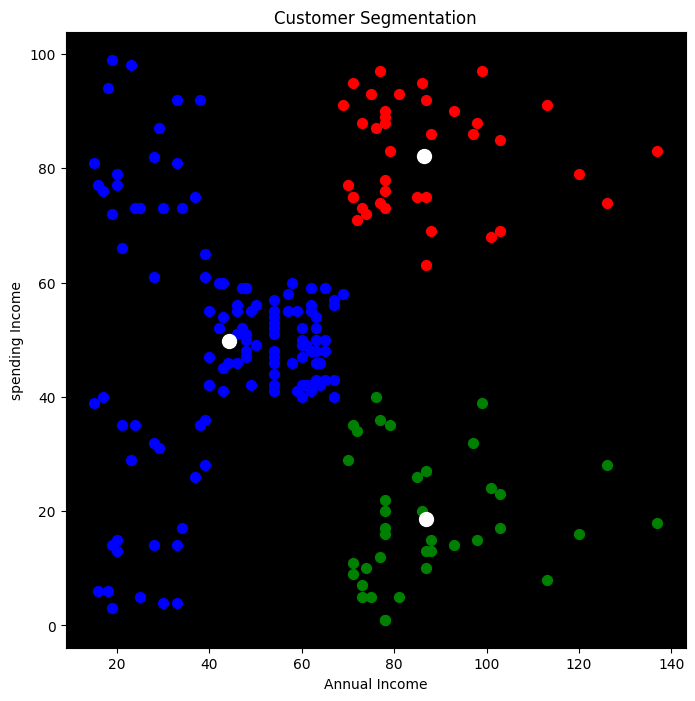

In [20]:
plt.figure(figsize=(8,8))
plt.gca().set_facecolor('black')
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label='Cluster 3')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='white',label="centroids")
plt.title("Customer Segmentation");
plt.xlabel("Annual Income");
plt.ylabel("spending Income");


### We can observe inadequate clustering when the number of clusters is set to 3.
#### It attains underfitting.

### What if cluster point taken as more than 5 .eg taken as 9

In [21]:
kmeans=KMeans(n_clusters=9,init='k-means++',random_state=42)
Y=kmeans.fit_predict(X)
print(Y)

[6 3 4 3 6 3 4 3 4 3 4 3 4 3 4 3 6 8 6 3 6 8 4 8 4 3 6 8 6 3 4 8 4 3 4 3 4
 8 6 8 6 3 6 8 6 8 8 6 6 6 0 8 0 8 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 0 5 2 5 2 5
 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 1 7 1 7 1 7
 1 7 1 7 1 7 1 7 1 7 1 7 1 7 1]


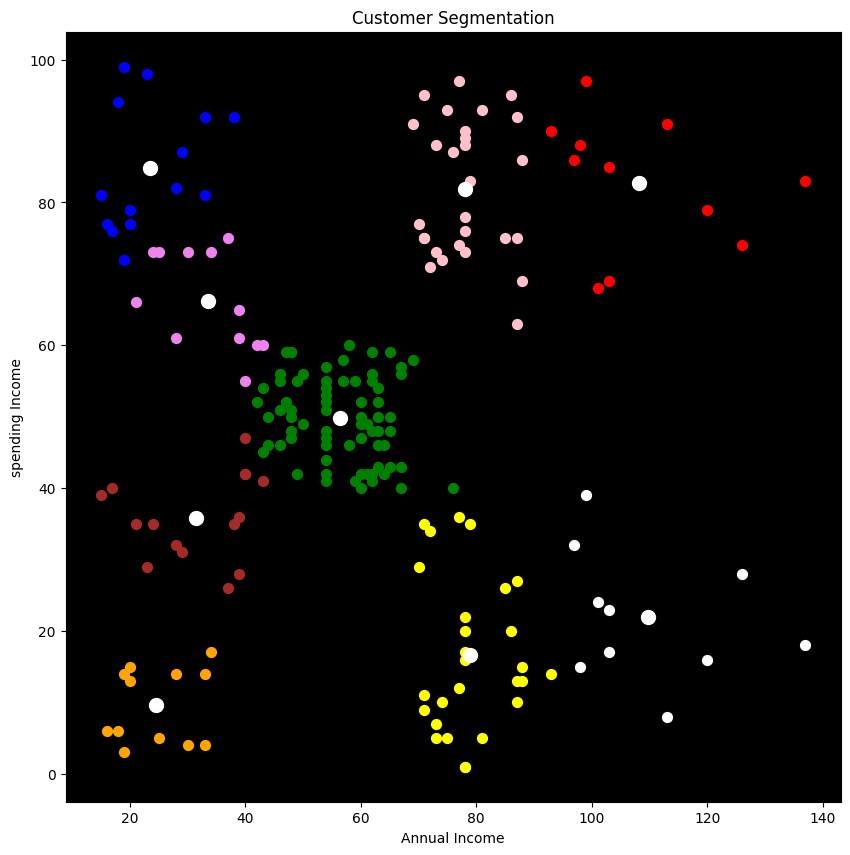

In [22]:
plt.figure(figsize=(10,10))
plt.gca().set_facecolor('black')
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='orange',label='Cluster 5')
plt.scatter(X[Y==5,0],X[Y==5,1],s=50,c='pink',label='Cluster 6')
plt.scatter(X[Y==6,0],X[Y==6,1],s=50,c='brown',label='Cluster 7')
plt.scatter(X[Y==7,0],X[Y==7,1],s=50,c='white',label='Cluster 8')
plt.scatter(X[Y==8,0],X[Y==8,1],s=50,c='violet',label='Cluster 9')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='white',label="centroids")
plt.title("Customer Segmentation");
plt.xlabel("Annual Income");
plt.ylabel("spending Income");


#### It attains overfitting.

### We can conclude that using 5 as the number of cluster points yields accurate clustering.

- Thus,customer segmentation using Kmeans successfully analysed.